# Options
## Buildout of options pricers and greek calculators

In [3]:
# options and greeks pricer
from math import exp, log, sqrt
from scipy.stats import norm

class Options:
    def __init__(self, S, K, r, T, sigma, option_type):
        self.S = S
        self.K = K
        self.r = r
        self.T = T
        self.sigma = sigma
        self.option_type = option_type
    
    def d1(self):
        return (log(self.S / self.K) + (self.r + 0.5 * self.sigma ** 2) * self.T) / (self.sigma * sqrt(self.T))
    
    def d2(self):
        return self.d1() - self.sigma * sqrt(self.T)
    
    def price(self):
        if self.option_type == 'call':
            return self.S * norm.cdf(self.d1()) - self.K * exp(-self.r * self.T) * norm.cdf(self.d2())
        elif self.option_type == 'put':
            return self.K * exp(-self.r * self.T) * norm.cdf(-self.d2()) - self.S * norm.cdf(-self.d1())
        else:
            return 'Invalid option type'
        
    def delta(self):
        if self.option_type == 'call':
            return norm.cdf(self.d1())
        elif self.option_type == 'put':
            return norm.cdf(self.d1()) - 1
        else:
            return 'Invalid option type'
        
    def gamma(self):
        return norm.pdf(self.d1()) / (self.S * self.sigma * (self.T ** 0.5))
    
    def theta(self):
        a = -self.S * norm.pdf(self.d1()) * self.sigma / (2 * (self.T ** 0.5))
        b = self.r * self.K * norm.cdf(self.d2()) * exp(-self.r * self.T)
        if self.option_type == 'call':
            return a - b
        elif self.option_type == 'put':
            return a + b
        else:
            return 'Invalid option type'
    
    def vega(self):
        return self.S * norm.pdf(self.d1()) * (self.T ** 0.5)
    
    def rho(self):
        if self.option_type == 'call':
            return self.K * self.T * exp(-self.r * self.T) * norm.cdf(self.d2())
        elif self.option_type == 'put':
            return -self.K * self.T * exp(-self.r * self.T) * norm.cdf(-self.d2())
        else:
            return 'Invalid option type'
    
    def all_greeks(self):
        return [self.delta(), self.gamma(), self.theta(), self.vega(), self.rho()]


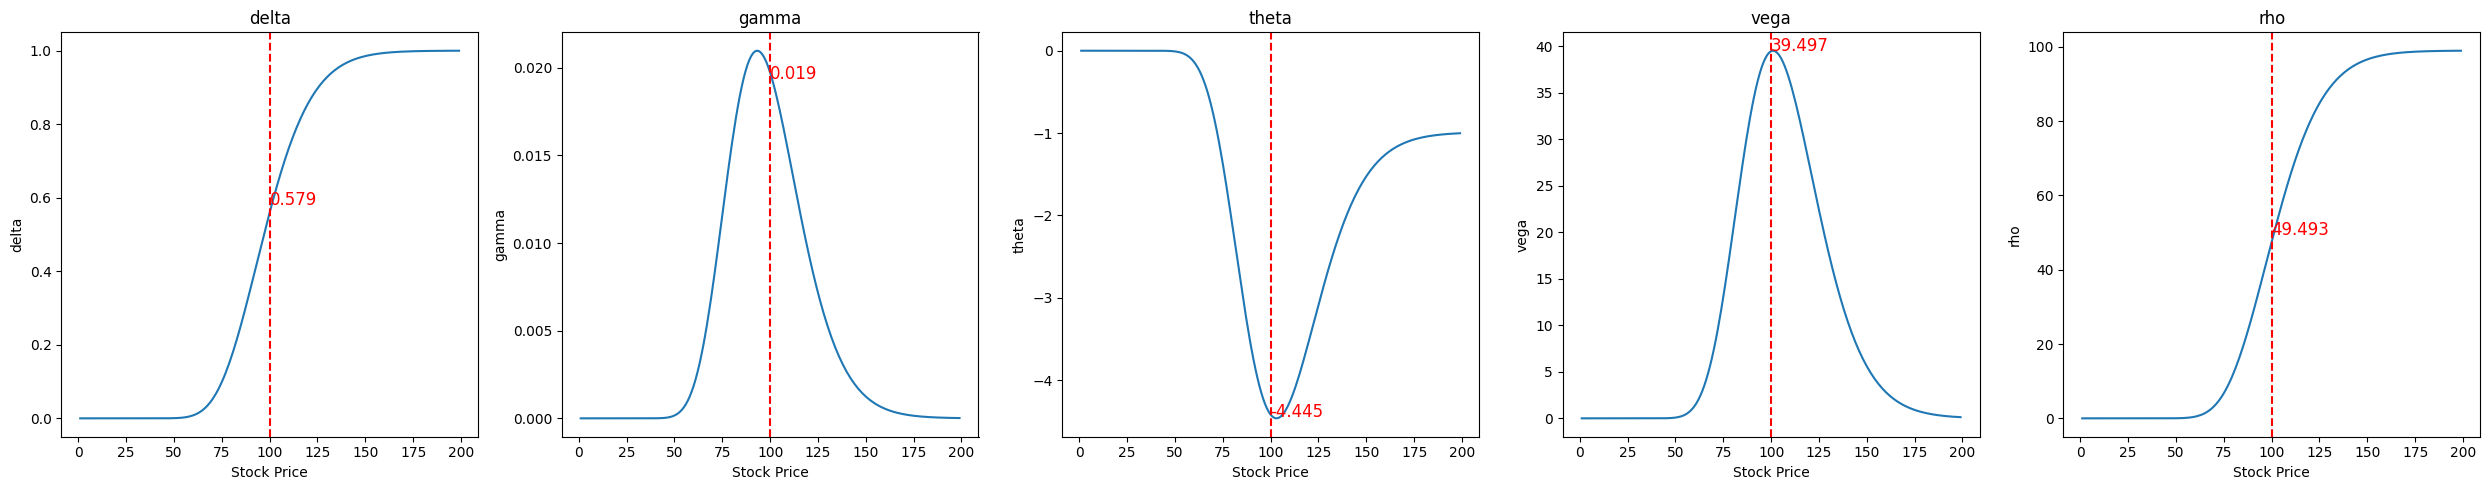

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# create a table of the greeks of an option
S = 100

# greek table with the first row being the greeks names and index being the stock prices
greeks = pd.DataFrame(columns = ['delta', 'gamma', 'theta', 'vega', 'rho'])

for i in range(1, S * 2, 1):
    call = Options(i, 100, 0.01, 1, 0.2, 'call')
    greeks.loc[i] = call.all_greeks()

# plot the greeks in a single figure but in different subplots
fig, axs = plt.subplots(1, 5, figsize = (25, 5))
for i, ax in enumerate(axs.flat):
    ax.plot(greeks.iloc[:, i])
    ax.set_title(greeks.columns[i])
    ax.set_xlabel('Stock Price')
    ax.set_ylabel(greeks.columns[i])
    ax.axvline(x = 100, color = 'r', linestyle = '--')
    # mark the value of the greeks at the stock price of 100
    ax.text(100, greeks.iloc[100, i], str(greeks.iloc[100, i].round(3)), fontsize = 12, color = 'r')
plt.tight_layout()
plt.show()

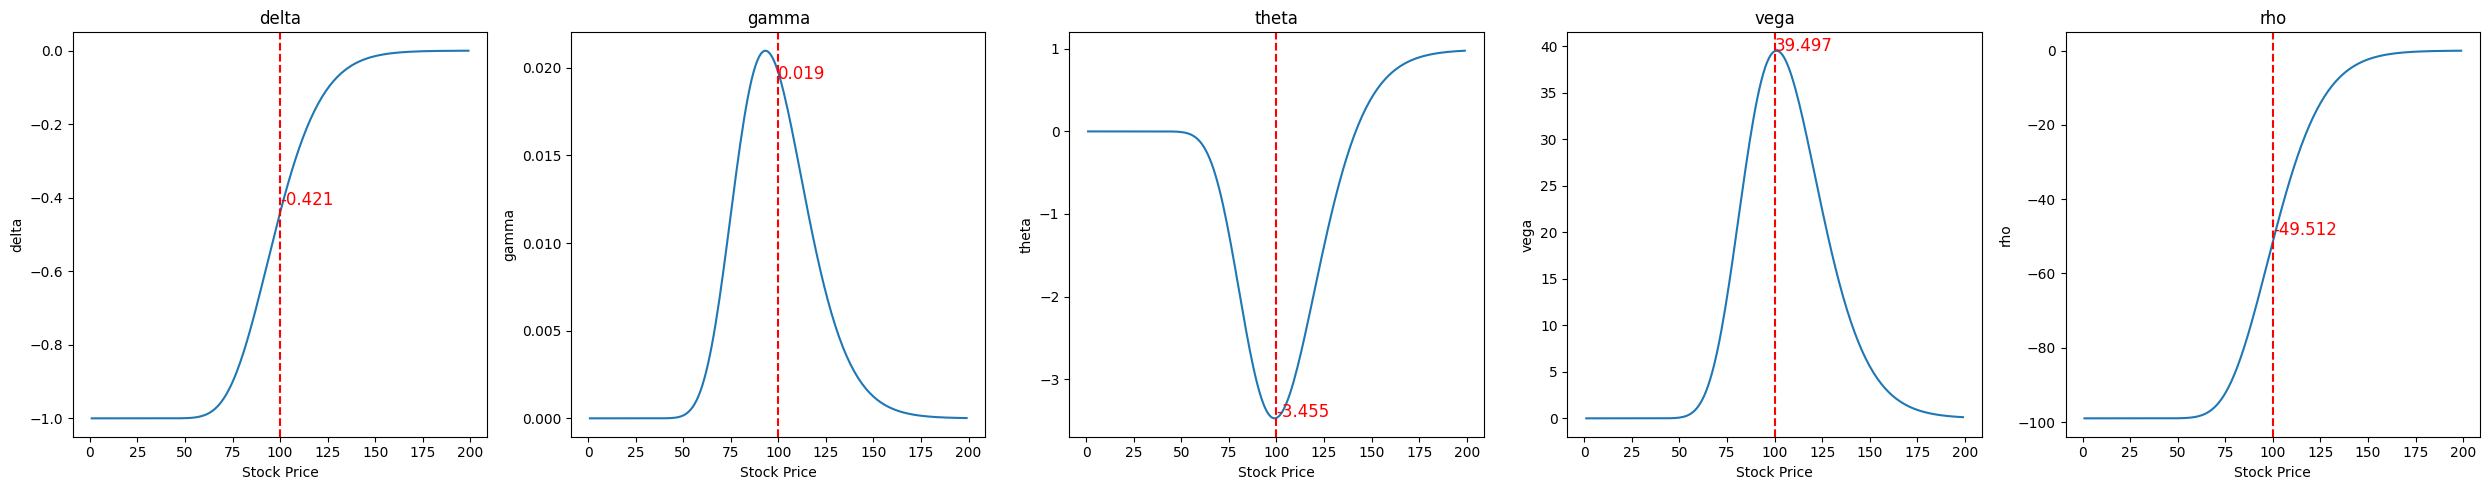

In [25]:
# create a table of the greeks of a put option
greeks = pd.DataFrame(columns = ['delta', 'gamma', 'theta', 'vega', 'rho'])

for i in range(1, S * 2, 1):
    put = Options(i, 100, 0.01, 1, 0.2, 'put')
    greeks.loc[i] = put.all_greeks()

# plot the greeks in a single figure but in different subplots
fig, axs = plt.subplots(1, 5, figsize = (25, 5))
for i, ax in enumerate(axs.flat):
    ax.plot(greeks.iloc[:, i])
    ax.set_title(greeks.columns[i])
    ax.set_xlabel('Stock Price')
    ax.set_ylabel(greeks.columns[i])
    ax.axvline(x = 100, color = 'r', linestyle = '--')
    # mark the value of the greeks at the stock price of 100
    ax.text(100, greeks.iloc[100, i], str(greeks.iloc[100, i].round(3)), fontsize = 12, color = 'r')
plt.tight_layout()
plt.show()

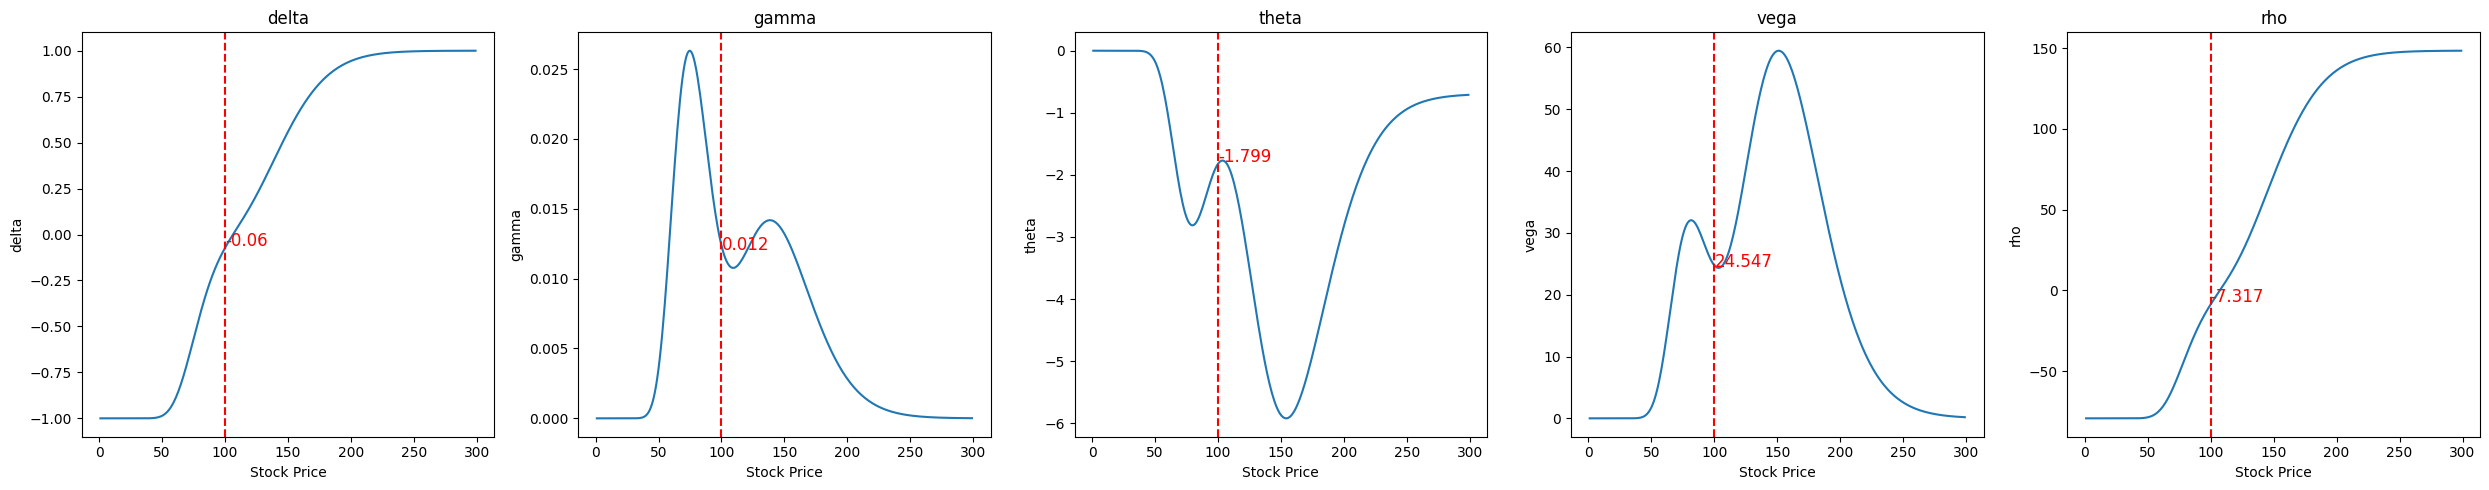

In [35]:
# plot strangle greeks for 80% and 120% strikes
greeks = pd.DataFrame(columns = ['delta', 'gamma', 'theta', 'vega', 'rho'])
S = 150

for i in range(1, S * 2, 1):
    call = Options(i, 150, 0.01, 1, 0.2, 'call')
    put = Options(i, 80, 0.01, 1, 0.2, 'put')
    greeks.loc[i] = [c + p for c, p in zip(call.all_greeks(), put.all_greeks())]

# plot the greeks in a single figure but in different subplots
fig, axs = plt.subplots(1, 5, figsize = (25, 5))
for i, ax in enumerate(axs.flat):
    ax.plot(greeks.iloc[:, i])
    ax.set_title(greeks.columns[i])
    ax.set_xlabel('Stock Price')
    ax.set_ylabel(greeks.columns[i])
    ax.axvline(x = 100, color = 'r', linestyle = '--')
    # mark the value of the greeks at the stock price of 100
    ax.text(100, greeks.iloc[100, i], str(greeks.iloc[100, i].round(3)), fontsize = 12, color = 'r')
plt.tight_layout()
plt.show()